# Neural Networks for Classification

In this notebook we are going to explore the use of Neural Networks for image classification. We are going to use a dataset of small images of clothes and accessories, the Fashion MNIST. You can find more information regarding the dataset here: https://pravarmahajan.github.io/fashion/

Each instance in the dataset consist of an image, in a format similar to the digit images you have seen in the previous homework, and a label. The labels correspond to the type of clothing, as follows:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Let's first load the required packages.

In [233]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

The following is a function to load the data, that we are going to use later in the notebook.

In [234]:
# helper function to load Fashion MNIST dataset from disk
def load_fashion_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

## TO DO 0
Place your ID ("numero di matricola") that will be used as seed for random generator. Change the ID number in case you observe unexpected behaviours and want to test if this is due to randomization (e.g., train/test split). If you change the ID number explain why you have change it.

In [235]:
ID = 1234004
np.random.seed(ID)

Now we load the dataset using the function above.

In [236]:
#load the fashion MNIST dataset and normalize the features so that each value is in [0,1]
X, y = load_fashion_mnist("data")
# rescale the data
X = X / 255.0

Now we split the data into training and test. Make sure that each label is present at least 10 times
in the training set.

In [237]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rest as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [62 59 40 48 49 54 48 44 48 48]


The following function plots an image and the corresponding label, to be used to inspect the data when needed.

In [238]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

Now let's test the function above and check few images.

INPUT:


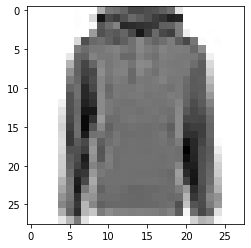

LABEL: 2
INPUT:


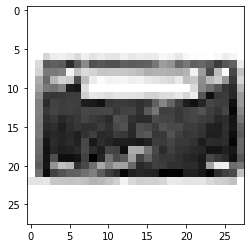

LABEL: 8
INPUT:


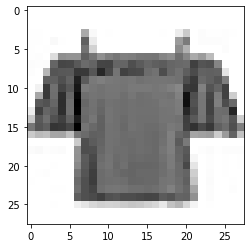

LABEL: 6


In [239]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,300)

## TO DO 1

Now use a (feed-forward) Neural Network for prediction. Use the multi-layer perceptron (MLP) classifier MLPClassifier(...) in scikit-learn, with the following parameters: max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization parameter for L2 regularization that is used by the MLP in sklearn.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 100. You can evaluate the architectures you chose using the GridSearchCV with a 5-fold cross-validation, and use the results to pick the best architecture. The code below provides some architectures you can use, but you can choose other ones if you prefer.


In [240]:
#MLPclassifier requires in input the parameter hidden_layer_sizes, that is a tuple specifying the number of 
#neurons in the hidden layers; for example: (10,) means that there is only 1 hidden layer with 10 neurons; 
#(10,50) means that there are 2 hidden layers, the first with 10 neurons, the second with 50 neurons

#these are examples of possible architectures you can test, but feel free to use different architectures! 
hl_parameters = {'hidden_layer_sizes': [(10,), (50,), (75,), (100,), (10,10,), (50,50,), (50,50,50,)]}

mlp_cv = MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID)

clf = GridSearchCV(mlp_cv, hl_parameters, cv=5)
clf.fit(X_train, y_train)
    
print ('RESULTS FOR NN\n')

results = clf.cv_results_
print("Best parameters set found:", clf.best_params_)
print("Score with best parameters:", clf.best_score_)
print("\nAll scores on the grid:", results["mean_test_score"])

/Users/pham/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RESULTS FOR NN

Best parameters set found: {'hidden_layer_sizes': (50,)}
Score with best parameters: 0.694

All scores on the grid: [0.5   0.694 0.652 0.688 0.428 0.614 0.518]


## TO DO 2

What do you observe for different architectures and their scores? How do the number of layers and their sizes affect the performances?

**Answer**: I observe that adding more than one hidden layer does not improve the performances of the model. With one hidden layer, the score increases as we increase the size of the layer until around 50 neurons, then it gets worse as we increase the size further.

## TO DO 3

Now get training and test error (according to the initial split) for a NN with best parameters chosen from the cross-validation above (and learning the NN weights from the entire training set). Use verbose=True
in input so to see how loss changes in iterations. (Note that the loss used by the MLPclassifier may be different from the 0-1 loss, also called *accuracy*.)

In [241]:
#get training and test error for the best NN model from CV

best_mlp = MLPClassifier(clf.best_params_['hidden_layer_sizes'], max_iter=300, alpha=1e-4, 
                    solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID, verbose=True)

# best_mlp = clf.best_estimator_

# fit the model on the entire training set
best_mlp.fit(X_train, y_train)

#get the training and test error
training_error = 1. - best_mlp.score(X_train,y_train)
test_error = 1. - best_mlp.score(X_test,y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

Iteration 1, loss = 2.24630223
Iteration 2, loss = 1.60553541
Iteration 3, loss = 1.12610339
Iteration 4, loss = 1.08223761
Iteration 5, loss = 0.88393465
Iteration 6, loss = 0.72421339
Iteration 7, loss = 0.71062573
Iteration 8, loss = 0.67564529
Iteration 9, loss = 0.59729332
Iteration 10, loss = 0.52649643
Iteration 11, loss = 0.49407167
Iteration 12, loss = 0.46603068
Iteration 13, loss = 0.45264681
Iteration 14, loss = 0.41259077
Iteration 15, loss = 0.36754254
Iteration 16, loss = 0.38053177
Iteration 17, loss = 0.34066452
Iteration 18, loss = 0.30630765
Iteration 19, loss = 0.34728724
Iteration 20, loss = 0.28228788
Iteration 21, loss = 0.27643987
Iteration 22, loss = 0.28058263
Iteration 23, loss = 0.22033056
Iteration 24, loss = 0.33941224
Iteration 25, loss = 0.31825837
Iteration 26, loss = 0.23117572
Iteration 27, loss = 0.18275091
Iteration 28, loss = 0.18096823
Iteration 29, loss = 0.14544434
Iteration 30, loss = 0.17961585
Iteration 31, loss = 0.12702468
Iteration 32, los

## More data 
Now let's do the same but using 10000 (or less if it takes too long on your machine) data points for training. Use the same NN architectures as before, but you can try more if you want!

In [242]:
X = X[permutation]
y = y[permutation]

m_training = 10000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts=True)

Labels and frequencies in training dataset: 


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1017,  996,  973, 1021,  996, 1014,  982, 1018, 1017,  966]))

## TO DO 4

Now train the NNs with the added data points. Feel free to try more different architectures than before if you want, or less if it takes too much time. You can use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [243]:
#for NN we try the same architectures as before

hl_parameters = {'hidden_layer_sizes': [(50,), (75,), (100,), (200,), (10,10,), (50,50,)]}

mlp_large_cv = MLPClassifier(max_iter=150, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID)

clf = GridSearchCV(mlp_large_cv, hl_parameters, cv=5)
clf.fit(X_train, y_train)
    
print ('RESULTS FOR NN\n')

results = clf.cv_results_
print("Best parameters set found:", clf.best_params_)
print("Score with best parameters:", clf.best_score_)
print("\nAll scores on the grid:", results["mean_test_score"])

/Users/pham/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/pham/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/pham/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RESULTS FOR NN

Best parameters set found: {'hidden_layer_sizes': (200,)}
Score with best parameters: 0.7953

All scores on the grid: [0.7925 0.7892 0.7754 0.7953 0.579  0.5515]


## TO DO 5
Describe your architecture choices and the results you observe with respect to the architectures you used.

**Answer**: the best architecture I found is by using one hidden layer of 200 neurons. We can notice that by having more training data we can afford to increase the complexity of the architecture while improving the performances of the model. 

## TO DO 6

Get the train and test error for the best NN you obtained with 10000 points. This time you can run for 100 iterations if you cannot run for 300 iterations. 


In [244]:
best_mlp_large = MLPClassifier(clf.best_params_['hidden_layer_sizes'], max_iter=150, alpha=1e-4, 
                    solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID, verbose=True)

# fit the model on the entire training set
best_mlp_large.fit(X_train, y_train)

#get the training and test error
training_error = 1. - best_mlp_large.score(X_train,y_train)
test_error = 1. - best_mlp_large.score(X_test,y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

Iteration 1, loss = 0.84098027
Iteration 2, loss = 0.48555769
Iteration 3, loss = 0.43378204
Iteration 4, loss = 0.39309433
Iteration 5, loss = 0.36249780
Iteration 6, loss = 0.34091762
Iteration 7, loss = 0.31790506
Iteration 8, loss = 0.30127745
Iteration 9, loss = 0.28550535
Iteration 10, loss = 0.27317166
Iteration 11, loss = 0.27029430
Iteration 12, loss = 0.25272694
Iteration 13, loss = 0.23962594
Iteration 14, loss = 0.23298162
Iteration 15, loss = 0.21901324
Iteration 16, loss = 0.22032393
Iteration 17, loss = 0.20527671
Iteration 18, loss = 0.19453136
Iteration 19, loss = 0.18683373
Iteration 20, loss = 0.18231505
Iteration 21, loss = 0.17482211
Iteration 22, loss = 0.18044035
Iteration 23, loss = 0.15506427
Iteration 24, loss = 0.15714238
Iteration 25, loss = 0.15847537
Iteration 26, loss = 0.14463310
Iteration 27, loss = 0.14006451
Iteration 28, loss = 0.13919533
Iteration 29, loss = 0.12641891
Iteration 30, loss = 0.12638038
Iteration 31, loss = 0.12881258
Iteration 32, los

## TO DO 7

Compare the train and test error you got with a large number of samples with the best one you obtained with only 500 data points. Are the architectures the same or do they differ? What about the errors you get?

**Answer**: we get much better results by using a larger number of samples. The architecture with a larger training set is a little bit more complex because by having more training data we can afford to increase the complexity of the architecture while improving the performances of the model.

## TO DO 8

Plot an image that was missclassified by NN with m=500 training data points and it is now instead correctly classified by NN with m=10000 training data points.

INPUT:


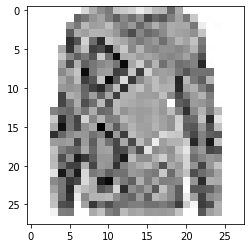

LABEL: 6
NN with 10000 samples prediction:  6
NN with 500 samples prediction:  2


In [245]:
best_mlp_large_prediction = best_mlp_large.predict(X_train)
best_mlp_prediction = best_mlp.predict(X_train)

for i in range(len(X_train)):
    if best_mlp_large_prediction[i] == y_train[i] and best_mlp_prediction[i] != y_train[i]:
        plot_input(X_train,y_train,i)
        print("NN with 10000 samples prediction: ", best_mlp_large_prediction[i])
        print("NN with 500 samples prediction: ", best_mlp_prediction[i])
        break

Let's plot some of the weigths of the multi-layer perceptron classifier, for the best NN we get with 500 data points and with 10000 data points. The code below plots the weights in a matrix form, where a figure represents all the weights of the edges entering in a hidden node. Notice that the code assumes that the NNs are called "mlp" and "best_mlp_large": you may need to replace such variables with your variable names. 



Weights with 500 data points:


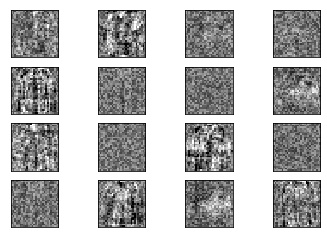

Weights with 10000 data points:


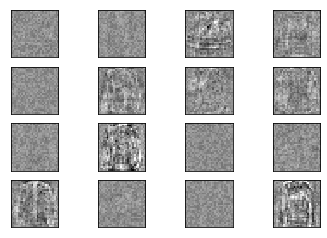

In [246]:
print("Weights with 500 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_mlp.coefs_[0].min(), best_mlp.coefs_[0].max()
for coef, ax in zip(best_mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 10000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_mlp_large.coefs_[0].min(), best_mlp_large.coefs_[0].max()
for coef, ax in zip(best_mlp_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## TO DO 9

Describe what do you observe by looking at the weights.

**Answer**: by looking at the images representing the weights I can notice some patterns which resemble some image of clothing such as shirts or pullovers. 

## TO DO 10

Pick another classifier among the ones we have seen previously (SVM or something else). Report the training and test error for such classifier with 10000 samples in the training set, if possible; if the classifier cannot run with so many data sample reduce the number of samples.

*Note*: if there are parameters to be optimized use cross-validation. If you choose SVM, you can decide if you want to use a single kernel or use the best among many; in the latter case, you need to pick the best kernel using cross-validation (using the functions available in sklearn).

**Answer**: I am going to use SVM with cross validation to find the best kernel among linear, poly and rbf.

In [247]:
from sklearn.svm import SVC

parameters = {'kernel': ['linear', 'poly', 'rbf']}

#run linear SVM
SVM = SVC(max_iter=100)

#find best model using 5-fold CV 
clf = GridSearchCV(SVM, parameters)
clf.fit(X_train, y_train)

print ('RESULTS FOR GRID SEARCH CV\n')

results = clf.cv_results_
print("Best parameters set found:", clf.best_params_)
print("Score with best parameters:", clf.best_score_)
print("\nAll scores on the grid:", results["mean_test_score"])


#get training and test error for the best SVM model from CV
best_SVM = SVC(max_iter=300, kernel=clf.best_params_['kernel'])

# fit the model on the entire training set
best_SVM.fit(X_train, y_train)

#get the training and test error
training_error_other = 1. - best_SVM.score(X_train,y_train)
test_error_other = 1. - best_SVM.score(X_test,y_test)

print ('RESULTS FOR OTHER CLASSIFIER\n')

print ("Best training error (other model): %f" % training_error_other)
print ("Best test error (other model): %f" % test_error_other)

/Users/pham/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/pham/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/pham/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/pham/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/U

RESULTS FOR GRID SEARCH CV

Best parameters set found: {'kernel': 'linear'}
Score with best parameters: 0.7386

All scores on the grid: [0.7386 0.4963 0.6906]


/Users/pham/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


RESULTS FOR OTHER CLASSIFIER

Best training error (other model): 0.171400
Best test error (other model): 0.227080


## TO DO 11
Compare the results of NN and of the other classifier you have chosen above. Which classifier would you preferer? Provide a brief explanation.

**Answer**: The best kernel found for SVM using cross validation is the linear kernel. The NN performs much better compared to the SVM. I assume that the NN is better at extracting complex features as long as we find the correct architecture.

# Clustering with K-means

Clustering is a useful technique for *unsupervised* learning. We are now going to cluster 2000 images in the fashion MNIST dataset, and try to understand if the clusters we obtain correspond to the true labels.

In [248]:
#load the required packages

from sklearn import metrics
from sklearn.cluster import KMeans

(Note that the code below assumes that the data has already been transformed as in the NN part of the notebook, so make sure to run the code for the transformation even if you do not complete the part on NN.)

In [249]:
#let's consider only 2000 data points

X = X[permutation]
y = y[permutation]

m_training = 2000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

## TO DO 1
Cluster the points using the KMeans() and fit() functions (see the userguide for details). For Kmeans, set: n_clusters=10 as number of clusters; n_init=10 as the number of times the algorithm will be run with different centroid seeds; random_state = ID. You can use the default setting for the other parameters.

In [250]:
kmeans = KMeans(n_clusters=10, n_init=10, random_state = ID)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234004, tol=0.0001, verbose=0)

## Comparison of clusters with true labels

## TO DO 2
Now compare the obtained clusters with the true labels, using the function sklearn.metrics.cluster.contingency_matrix() (see the userguide for details). The function prints a matrix $A$ such that entry $A_{i,j}$ is is the number of samples in true class $i$ and in predicted class $j$.

In [251]:
# compute and print the contingency matrix for the true labels vs the clustering assignments
y_predicted = kmeans.predict(X_train)
matrix = metrics.cluster.contingency_matrix(y_train, y_predicted)
print(matrix)

[[  0  74   6 105   2   1   0   0   1  22]
 [  0  16   2   2   0   0   0   0 169  16]
 [  0  48 131   4   3   0   0   1   0   0]
 [  0  40   3   2   0   0   0   0  58 110]
 [  0  40 133   0   1   0   0   2   1  35]
 [ 25  30   0   0   0 137  12   0   0   0]
 [  0  90  57  20   1   0   0   1   0  15]
 [ 37   0   0   0   0 178   0   0   0   0]
 [  6  13   5   0  72   4   0  71   0   1]
 [100   2   0   0   0   8  85   0   0   2]]


## TO DO 3
Based on the matrix shown above, comment on the results of clustering in terms of adherence to the true labels.

**Answer**: When the k-means algorithm seperate the data into clusters it doesn't know which cluster corresponds to which type of clothing. What we can notice is that for each true class $i$, the majority of samples with true class $i$ fall into one predicted class $j$ which I assume represents the cluster $i$. Many cell of the matrix $A_{i,j}$ are zero or very small values, which means that some types of clothing are perfectly distinguished from other types of clothing. Other values in the matrix with values neither large nor small indicate that there are some confusions over some pair of clothing types.

## Choice of k with silhoutte coefficient
In many real applications it is unclear what is the correct value of $k$ to use. In practice one tries different values of $k$ and then uses some external score to choose a value of $k$. One such score is the silhoutte coefficient, that can be computed with metrics.silhouette_score(). See the definition of the silhoutte coefficient in the userguide.

## TO DO 4
Compute the clustering for k=2,3,...,15 (other parameters as above) and print the silhoutte coefficient for each such clustering.

In [252]:
#run k-means with 10 choices of initial centroids for a range of values of n_clusters

for i in range(2,16):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state = ID)
    y_predicted = kmeans.fit_predict(X_train)
    silhouttescore = metrics.silhouette_score(X_train, y_predicted)
    print("Silhoutte coefficient for number of clusters="+str(i)+": "+str(silhouttescore))

Silhoutte coefficient for number of clusters=2: 0.19723554242949648
Silhoutte coefficient for number of clusters=3: 0.18437064709840154
Silhoutte coefficient for number of clusters=4: 0.18054246779457736
Silhoutte coefficient for number of clusters=5: 0.15589862187578818
Silhoutte coefficient for number of clusters=6: 0.15468150181258983
Silhoutte coefficient for number of clusters=7: 0.16393918442315644
Silhoutte coefficient for number of clusters=8: 0.16177878418333488
Silhoutte coefficient for number of clusters=9: 0.15434884884646413
Silhoutte coefficient for number of clusters=10: 0.15985610245933662
Silhoutte coefficient for number of clusters=11: 0.14017909799749179
Silhoutte coefficient for number of clusters=12: 0.13821374277537307
Silhoutte coefficient for number of clusters=13: 0.13112718203991836
Silhoutte coefficient for number of clusters=14: 0.12904809330818742
Silhoutte coefficient for number of clusters=15: 0.12570108724097753


## TO DO 5

Based on the silhoutte score, which $k$ would you pick? Motivate your choice. Does your choice match what you know about the data? If yes, explain why you think this is the case; if no, explain what you think may be the reason.

**Answer**: The silhuette coefficient decrease as we increase the number of clusters. By the results I would pick a number of clusters of 2. This is not what I expected because from our prior knowledge the clothing could be divided into 10 different classes. The reason could be because there isn't much distance between the classes in the vectorial space defined by the images of the training data. 